<a href="https://colab.research.google.com/github/shadab4150/Eye-Disease-Detection/blob/master/eye_disease_image_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as immg

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Dataset/dataset_eye.zip' -d '/content/eye/'

In [0]:
eye_img = [ '/content/eye/1_normal/NL_289.png', 
'/content/eye/2_cataract/cataract_095.png',
'/content/eye/2_glaucoma/Glaucoma_094.png', 
'/content/eye/3_retina_disease/Retina_084.png']

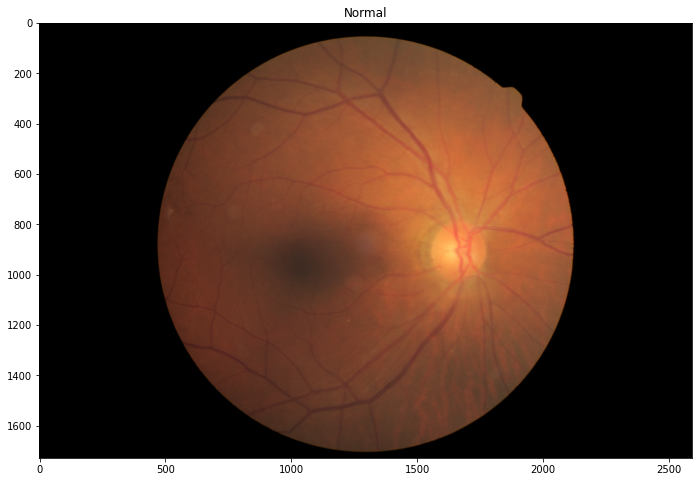

In [9]:
img = immg.imread(eye_img[0])
plt.figure(1,figsize=(18,8))
plt.imshow(img)
plt.title('Normal')
plt.show()

In [10]:
img.shape

(1728, 2592, 3)

In [0]:
path = Path('/content/eye/')

In [0]:


path_cat = Path('/content/eye_train/cataract/')
path_glau = Path('/content/eye_train/glaucoma/')
path_ret = Path('/content/eye_train/retina_disease/')
path_nor = Path('/content/eye_train/normal/')


# create smaller image sets the first time this nb is run


In [0]:
path_hr = path/'3_retina_disease'
il = ImageList.from_folder(path_hr)

def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=75)


In [48]:
sets = [(path_ret, 512)]
for p,size in sets:
  print(f"resizing to {size} into {p}")
  parallel(partial(resize_one, path=p, size=size), il.items)

resizing to 512 into /content/eye_train/retina_disease


In [0]:
import shutil

In [50]:
shutil.make_archive('eye_dataset_small','zip','/content/eye_train/')

'/content/eye_dataset_small.zip'

In [0]:
!cp '/content/eye_dataset_small.zip' '/content/drive/My Drive/Dataset/'